# Clasificador de imagenes


### **1. Importación de las librerías**



In [1]:
import os
import sys
from google.colab import drive

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **2. Importación del set de datos**
Para la creación del dataset de imágenes, seleccionamos 4 categorías de Mercadolibre: 
- 'CAMARAS Y ACCESORIOS'
- 'CELULARES Y TELEFONOS' 
- 'LIBROS Y REVISTAS'
- 'COTILLON Y FIESTAS'

In [116]:
folder_path='gdrive/MyDrive/imagenes/'
os.listdir(folder_path)

['MLA1039', 'MLA1051', 'MLA3025', 'MLA9304']

#### **2.1 Descarga de imágenes en variables locales**

In [103]:
img_width=128
img_height=128
images = []
labels=[]
i=0
clases=[]
for folders in os.listdir(folder_path):
  print ('\r', 'Carpeta ', folders)
  try:
    for img in os.listdir('./{}/{}/'.format(folder_path,folders)):
      img = load_img('./{}/{}/{}'.format(folder_path,folders,img), target_size=(img_width, img_height))
      img = np.asarray(img)
      img = np.expand_dims(img, axis=0)
      images.append(img)
      if folders == 'MLA1039':
        categoria = 'CAMARAS Y ACCESORIOS'
      if folders == 'MLA1051':
        categoria = 'CELULARES Y TELEFONOS'
      if folders == 'MLA3025':
        categoria = 'LIBROS Y REVISTAS'
      if folders == 'MLA9304':
        categoria = 'COTILLON Y FIESTAS'
      labels.append(categoria)
      i+=1
      print('\r', i, end='')
  except:
        print('Error en el archivo {}'.format(folders))
images = np.vstack(images)

 Carpeta  MLA1039
 Carpeta  MLA1051
 Carpeta  MLA3025
 Carpeta  MLA9304
 9340

### **3. Exploración del set de datos**

Lo siguiente muestra que hay 9340 imagenes, con cada imagen representada por pixeles de 128x128 , en 3 canales.

In [117]:
images.shape  

(9340, 128, 128, 3)

Verificamos las categorias:

In [118]:
list(set(labels))

['COTILLON Y FIESTAS',
 'CELULARES Y TELEFONOS',
 'LIBROS Y REVISTAS',
 'CAMARAS Y ACCESORIOS']

### **4. Pre-procesamiento  del set de datos**

Si vemos la primera imagen como ejemplo , se encuentra que los valores de los pixeles estan entre 0 y 255. Debemos escalar estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal, por ello se divide en 255. 

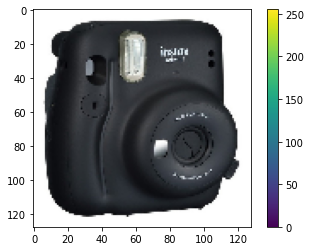

In [119]:
plt.figure()
plt.imshow(images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [120]:
X=images/255.0

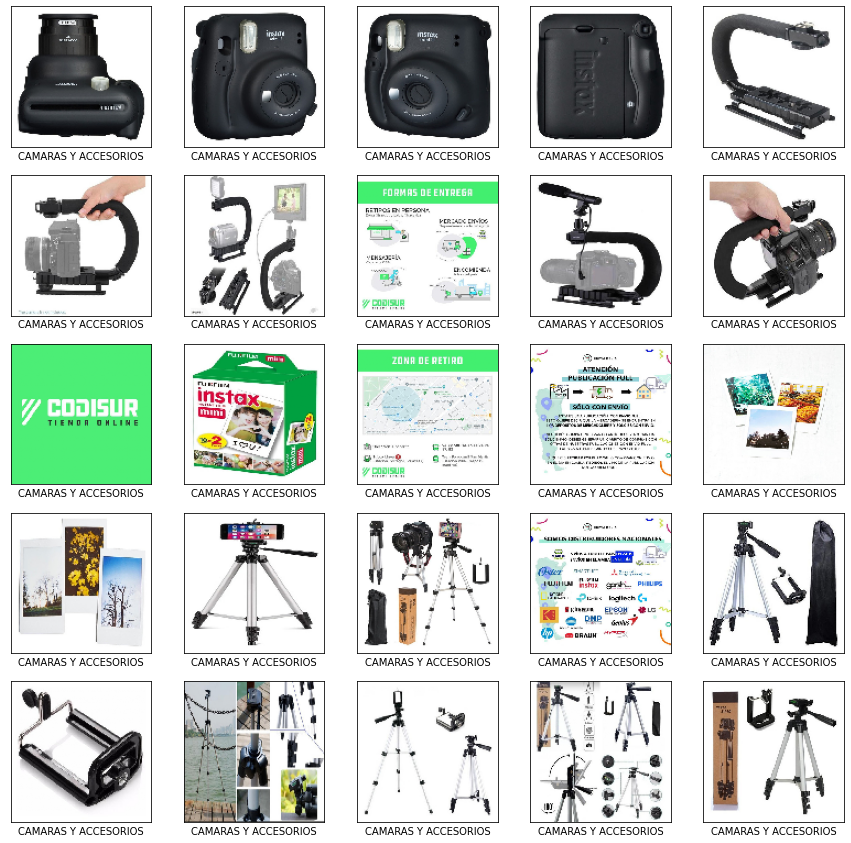

In [121]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

Al tener 4 categorías, utilizo OneHotEnconder para codificar:

In [10]:
encoder=OneHotEncoder()
encoder.fit(np.array(labels).reshape(-1,1))
y=encoder.transform(np.array(labels).reshape(-1,1))

In [11]:
y.todense()

matrix([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]])

Elimino las variables labels e images

In [12]:
del labels,images

### **5. Generación de los datasets de train y test** 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Dimensión de la matriz de X train: {}".format(X_train.shape)) 
print("Dimensión de la matriz de X test: {}".format(X_test.shape))
print("Dimensión de la matriz de y train {}".format(y_train.shape))
print("Dimensión de la matriz de y test {}".format(y_test.shape))


Dimensión de la matriz de X train: (6257, 128, 128, 3)
Dimensión de la matriz de X test: (3083, 128, 128, 3)
Dimensión de la matriz de y train (6257, 4)
Dimensión de la matriz de y test (3083, 4)


### **6. Construcción de los distintos modelos** 

Vamos a construir distintos modelos, preferentemente que no requieran una gran potencia computacional. Validaremos el Accuracy en test de cada uno para luego realizar predicciónes con el de mejor valor. Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo. 





#### **6.1 Modelo 1: Secuencial Convolucional** 

**Configuracion de las capas:**
- filtrosconv1 , filtrosconv 2, filtroconv3 = 32
- tamaño filtro 1 , tamaño filtro 2, tamaño filtro 3 = (3,3)
- tamaño pooling 2= (2,2)
- todas activaciones relu, excepto la ultima con una salida de 4 categorias.



In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

Se observa que esta red tiene 647,096 parametros para entrenar. 

**Compilación del modelo**

- Loss function (mide que tan exacto es el modelo durante el entrenamiento)
- Optimizer (como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida)
- Metrics (accuracy:exactitud)

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

**Entrenamiento del modelo 1** 

Requiere de los siguientes pasos:

  1. El set de datos de entrenamiento estan en los arreglos X_train y y_train.
  2. El modelo aprende a asociar imagenes y etiquetas.
  3. Se realizan predicciones sobre un set de datos ,incluidos en el arreglo X_test. Verifique que las predicciones sean iguales a las etiquetas del arreglo y_test.


In [17]:
y_train=y_train.todense()
y_test=y_test.todense()

In [18]:
history = model.fit(X_train, y_train, epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
196/196 [==============================] - 125s 633ms/step - loss: 0.9774 - accuracy: 0.5995 - val_loss: 0.8069 - val_accuracy: 0.6633
Epoch 2/5
196/196 [==============================] - 123s 626ms/step - loss: 0.6105 - accuracy: 0.7780 - val_loss: 0.5820 - val_accuracy: 0.7837
Epoch 3/5
196/196 [==============================] - 122s 625ms/step - loss: 0.4304 - accuracy: 0.8445 - val_loss: 0.5237 - val_accuracy: 0.8115
Epoch 4/5
196/196 [==============================] - 122s 624ms/step - loss: 0.3030 - accuracy: 0.8916 - val_loss: 0.5523 - val_accuracy: 0.8232
Epoch 5/5
196/196 [==============================] - 122s 624ms/step - loss: 0.2052 - accuracy: 0.9314 - val_loss: 0.4775 - val_accuracy: 0.8540


**Evaluamos la exactitud sobre datos test (es lo mismo que val_accuracy):**

In [19]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

97/97 - 13s - loss: 0.4775 - accuracy: 0.8540

Test accuracy: 0.8540382981300354


In [20]:
Modelo1= test_acc
Modelo1

0.8540382981300354

**Gráficos de resultados**

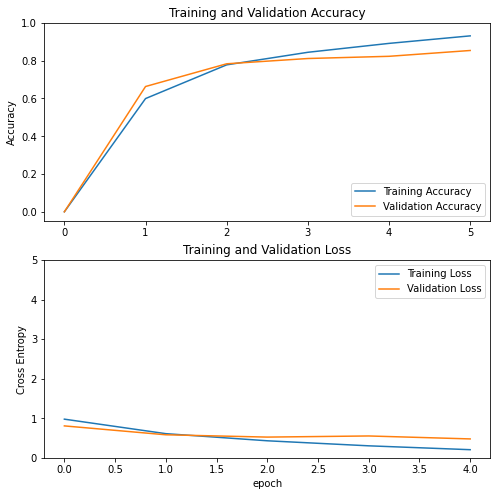

In [21]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

En este modelo vemos que las curvas de Accuracy de Training y Validation no se alejan demasiado a medida que corren los epochs.
Lo mismo ocurre con Cross Entropy donde las curvas muestran un comportamiento descendiente que no revierten.

En el primer epoch es donde se produce la mayor ganancia (aproximadamente hasta 0.7) , luego del segundo epoch se mantiene casi constante. Terminando con una accurancy en el set de validacion de 0.8540. Intuimos que a partir del epoch 2, el modelo empieza a hacer overfitting en Tranining.

Hemos intentado variar algunos de los hiperparámetros del modelo: utilizar MaxPooling2D de (3,3), y filtros conv2 y conv3 de 64 ,entre otros, pero con resultados de accuracy peores que el actual (del orden del 0.74). Por lo tanto dejamos este modelo básico como inicial.

#### **6.2 Modelo 2: Arquitectura Xception** 

Como primera arquitectura alternativa, usamos xception como red ya entrenada. La elección de la misma está basada en consideraciones prácticas que la ubican como de buena accuracy y de bajas operaciones (G-FLOPs)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.callbacks import EarlyStopping

new_model = Sequential()
new_model.add(Xception(include_top=False, weights='imagenet', pooling='avg'))
new_model.add(tfl.Dense(y_train.shape[1], activation='softmax',trainable=True))
new_model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 8196      
Total params: 20,869,676
Trainable params: 20,815,148
Non-trainable params: 54,528
_________________________________________________________________


In [43]:
#Cargamos el preprocesador del modelo de Xception:
preprocess_input = tf.keras.applications.xception.preprocess_input

**Entrenamiento del modelo 2**


In [48]:
history2=new_model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=20, epochs=5, verbose=1)

Epoch 1/5
313/313 [==============================] - 2182s 7s/step - loss: 0.6960 - accuracy: 0.7504 - val_loss: 8.3580 - val_accuracy: 0.6445
Epoch 2/5
313/313 [==============================] - 2020s 6s/step - loss: 0.4328 - accuracy: 0.8512 - val_loss: 0.5368 - val_accuracy: 0.8965
Epoch 3/5
313/313 [==============================] - 2014s 6s/step - loss: 0.3087 - accuracy: 0.9036 - val_loss: 0.9439 - val_accuracy: 0.8608
Epoch 4/5
313/313 [==============================] - 2030s 6s/step - loss: 0.2107 - accuracy: 0.9290 - val_loss: 1.4305 - val_accuracy: 0.8485
Epoch 5/5
313/313 [==============================] - 2025s 6s/step - loss: 0.1559 - accuracy: 0.9511 - val_loss: 1.6894 - val_accuracy: 0.8200


In [49]:
test_loss, test_acc = new_model.evaluate(X_test,  y_test, verbose=2)

97/97 - 175s - loss: 1.6894 - accuracy: 0.8200


**Evaluamos la exactitud sobre datos test**

In [50]:
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Test accuracy: 0.8199805617332458

Test loss: 1.6893788576126099


In [97]:
Modelo2= test_acc

**Gráficos de resultados**

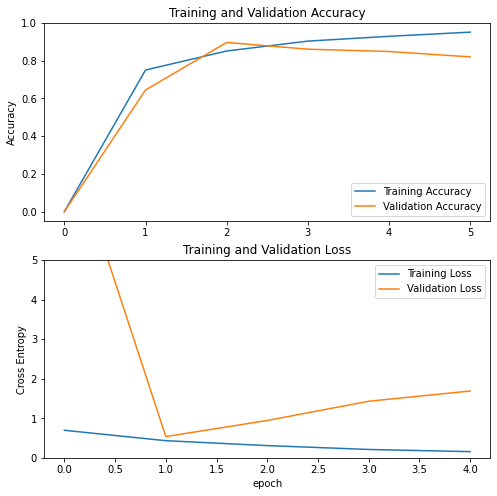

In [51]:
acc = [0.] + history2.history['accuracy']
val_acc = [0.] + history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

El modelo con arquitectura xception genera una curva de Accuracy que se vuelve descenciente para Validation a partir del epoch 2, a la vez que en Training tiende a seguir mejorando. Esto nos dá la pauta que el modelo empieza a hacer overfitting. La mejor Accuracy para Validation la logra en el epoch 2.
Respecto del gráfico de Cross Entropy, vemos el mejor valor para Validation en epoch 1, pero con una curva con pendiente más pronunciada y alejándose de la curva de Training para epochs siguientes. Esto coincide con lo observado en el grafico de Accuracy, donde identificamos que el modelo va haciendo más overfitting.

#### **6.3 Modelo 3: Arquitectura MobilNetV3** 

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping

new_model3 = Sequential()
new_model3.add(MobileNetV2(include_top=False, weights='imagenet', pooling='avg'))
new_model3.add(tfl.Dense(y_train.shape[1], activation='softmax',trainable=True))
new_model3.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
new_model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 2,228,996
Non-trainable params: 34,112
_________________________________________________________________


In [105]:
#Cargamos el preprocesador del modelo de MobileNetV2:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

**Entrenamiento del Modelo 3**

In [110]:
history3= new_model3.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=20, epochs=5, verbose=1)

Epoch 1/5
313/313 [==============================] - 421s 1s/step - loss: 0.8059 - accuracy: 0.7136 - val_loss: 11.5664 - val_accuracy: 0.4839
Epoch 2/5
313/313 [==============================] - 411s 1s/step - loss: 0.5490 - accuracy: 0.8055 - val_loss: 18.4762 - val_accuracy: 0.4392
Epoch 3/5
313/313 [==============================] - 416s 1s/step - loss: 0.4246 - accuracy: 0.8518 - val_loss: 11.5726 - val_accuracy: 0.5031
Epoch 4/5
313/313 [==============================] - 416s 1s/step - loss: 0.3177 - accuracy: 0.8928 - val_loss: 26.8880 - val_accuracy: 0.4392
Epoch 5/5
313/313 [==============================] - 415s 1s/step - loss: 0.2569 - accuracy: 0.9169 - val_loss: 30.7818 - val_accuracy: 0.4525


In [111]:
test_loss, test_acc = new_model3.evaluate(X_test,  y_test, verbose=2)

97/97 - 28s - loss: 30.7818 - accuracy: 0.4525


**Evaluamos la exactitud sobre datos test**

In [112]:
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Test accuracy: 0.45248135924339294

Test loss: 30.781768798828125


In [113]:
Modelo3= test_acc

**Gráficos de resultados**

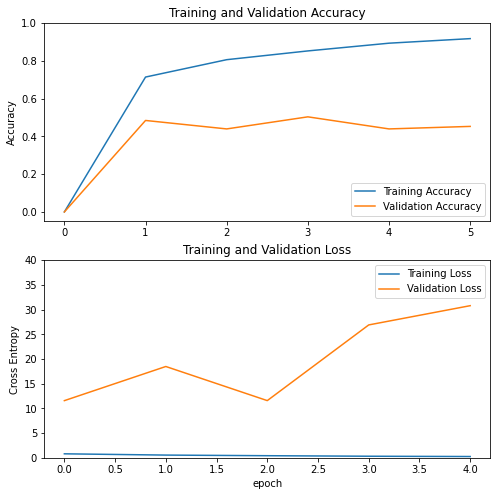

In [116]:
acc = [0.] + history3.history['accuracy']
val_acc = [0.] + history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,40])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Observamos las curvas de esta arquitectura y vemos que las tendencias de las curvas empeoran respecto del modelo anterior. Si bien el Accuracy de Validation se estabiliza a partir del epoch 1, el valor de Accuracy logrado es muy pobre. La separación creciente de la curva de Training nos indica que este modelo tiene una tendencia más pronunciada para el overfitting.
Un comportamiento similar vemos en la curva de Cross Entropy donde, en este caso, la curva de Validation no termina de estabilizarce.

### **7. Comparacion de modelos** 

In [55]:
resume= {"Test accurancy": [Modelo1,Modelo2,Modelo3]} 
resume = pd.DataFrame(data=resume, index=["Modelo 1", "Modelo 2","Modelo 3"])
resume


,Test accurancy
Modelo 1,0.854038
Modelo 2,0.819981
Modelo 3,0.452481


Tomamos como métrica comparativa de los modelos el Accuracy en Test, pero también consideramos los comentarios que hicimos al final de cada modelo/arquitectura, donde analizamos el comportamiento de las curvas de Accuracy y Cross Entropy.

### **8. Predicciones con el modelo elegido** 



Hacemos predicciones en base al Modelo Secuencial Convolucional (1), que fue el que obtuvo mejor accuracy.

In [89]:
predictions = model.predict(X_test)

In [90]:
predictions[0] 

array([0.742668  , 0.04829905, 0.11737663, 0.09165636], dtype=float32)

In [91]:
X_test.shape

(3083, 128, 128, 3)

In [111]:
class_names = ['CAMARAS Y ACCESORIOS', 'CELULARES Y TELEFONOS', 'COTILLON Y FIESTAS', 'LIBROS Y REVISTAS']

In [112]:
def plot_image(i, predictions_array, true_label, img):
  
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array) 
  original_label =  np.argmax(true_label)
  
  if predicted_label == original_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[original_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  original_label = np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[original_label].set_color('blue')

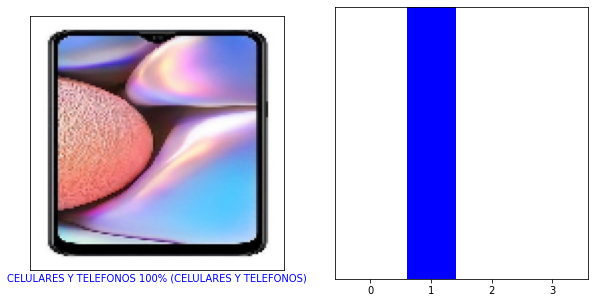

In [113]:
i = 35
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()

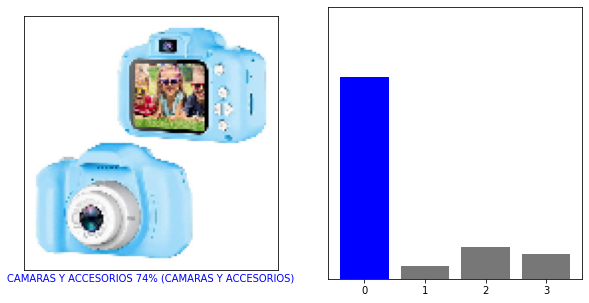

In [114]:
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Ploteamos las primeras 20 imágenes, con sus predicciones y sus valores reales.
Las predicciones correctas están en azul y las incorrectas en rojo.

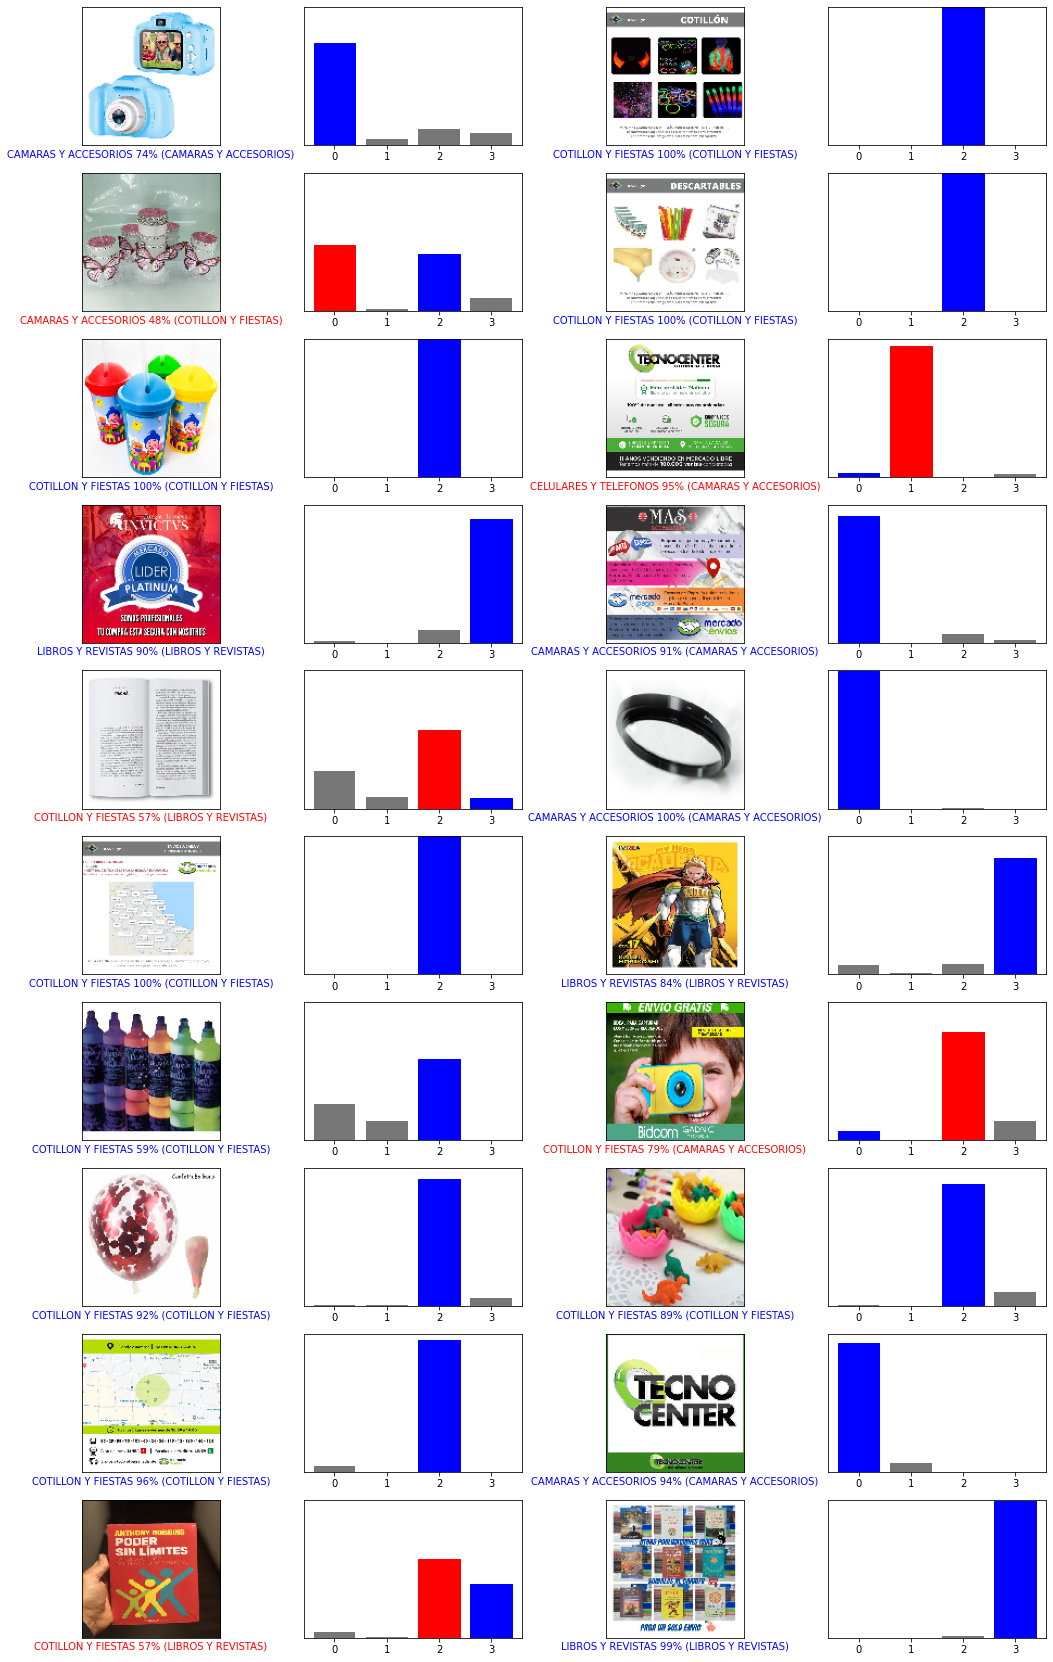

In [115]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(3*3*num_cols, 3*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
#plt.tight_layout()
plt.show()